# Подготовительная задача 1

Сделать из линейной регрессии nn.sequental двухслойную сеть

# Подготовительная задача 2

Добавить в np и torch реализации баесы

# Подготовительная задача 3 

В реализациях на np и разных вариантах на torch рисовать графики loss(iteration) и gradients(iterations)

(Все три задачи объединены в одну реализацию)

In [16]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import tqdm
from sklearn.datasets import fetch_mldata
from sklearn.preprocessing import LabelBinarizer
import sklearn.metrics as sm
import seaborn as sns
sns.set_style('whitegrid')

Populating the interactive namespace from numpy and matplotlib


In [17]:
mnist = fetch_mldata(dataname='MNIST original',data_home='mnist')
X,T = mnist['data'],mnist['target']
p = np.random.permutation(X.shape[0])

lb = LabelBinarizer()
X,T = X[p],lb.fit_transform(T[p])

X_train, T_train = X[:50000]/255.,T[:50000]
X_val,T_val = X[50000:60000]/255.,T[50000:60000]
X_test,T_test = X[60000:]/255.,T[60000:]

In [18]:
# -*- coding: utf-8 -*-
import numpy as np

# N - размер батча; D_in - размерность входа;
# H - скрытая размероность; D_out размерность выхода.
N, D_in, H, D_out = 64, 1000, 100, 10

losses = []
gradients_w1 = []
gradients_w2 = [] 
gradients_b1 = []
gradients_b2 = [] 
# Инициализируем вход и выход из нормального распределения
x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)

# Инициализируем веса из нормального распределения
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)
b1 = np.random.randn(H)
b2 = np.random.randn(D_out)

learning_rate = 1e-6
for t in tqdm.tqdm(range(500)):

    h = x.dot(w1) + b1
    h_relu = np.maximum(h, 0)
    
    # Используем функцию активации ReLU
    
    y_pred = h_relu.dot(w2) + b2

    # Считаем функцию потерь
    loss = np.square(y_pred - y).sum()
    losses.append(loss)
    # Считаем градиенты
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_b2 = grad_y_pred.T.dot(np.ones(N))
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    
    # Считаем композицию с производной ReLU
    grad_h[h < 0] = 0
    grad_w1 = x.T.dot(grad_h)
    grad_b1 = grad_h.T.dot(np.ones(N))
    
    gradients_w1.append(np.linalg.norm(grad_w1))
    gradients_w2.append(np.linalg.norm(grad_w2))
    gradients_b1.append(np.linalg.norm(grad_b1))
    gradients_b2.append(np.linalg.norm(grad_b2))

    
    # Обновляем веса
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2
    b1 -= learning_rate * grad_b1
    b2 -= learning_rate * grad_b2

100%|██████████| 500/500 [00:01<00:00, 281.89it/s]


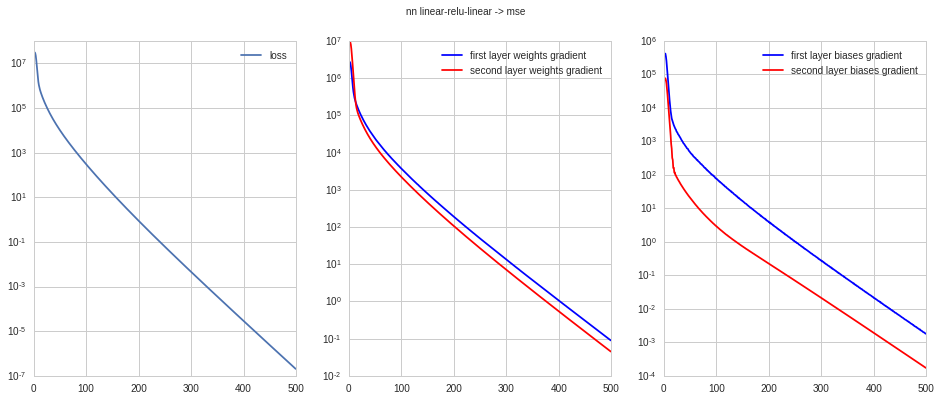

In [19]:
fig,ax = plt.subplots(ncols=3,figsize=(16,6))
fig.suptitle('nn linear-relu-linear -> mse')
ax[0].semilogy(losses,label='loss')
ax[1].semilogy(gradients_w1,'b',label='first layer weights gradient')
ax[1].semilogy(gradients_w2,'r',label='second layer weights gradient')
ax[2].semilogy(gradients_b1,'b',label='first layer biases gradient')
ax[2].semilogy(gradients_b2,'r',label='second layer biases gradient')
for a in ax:
    a.legend()
plt.show()

In [20]:
# -*- coding: utf-8 -*-
import numpy as np

# N - размер батча; D_in - размерность входа;
# H - скрытая размероность; D_out размерность выхода.
N, D_in, H, D_out = 64, 1000, 100, 10

losses = []
gradients_w1 = []
gradients_w2 = [] 
gradients_b1 = []
gradients_b2 = [] 
# Инициализируем вход и выход из нормального распределения
x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)

# Инициализируем веса из нормального распределения
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)
b1 = np.random.randn(H)
b2 = np.random.randn(D_out)

learning_rate = 1e-6
for t in tqdm.tqdm(range(500)):

    h = x.dot(w1) + b1
    
    
    # Используем функцию активации ReLU
    
    y_pred = h.dot(w2) + b2

    # Считаем функцию потерь
    loss = np.square(y_pred - y).sum()
    losses.append(loss)
    # Считаем градиенты
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_b2 = grad_y_pred.T.dot(np.ones(N))
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    
    # Считаем композицию с производной ReLU
    #grad_h[h < 0] = 0
    grad_w1 = x.T.dot(grad_h)
    grad_b1 = grad_h.T.dot(np.ones(N))
    
    gradients_w1.append(np.linalg.norm(grad_w1))
    gradients_w2.append(np.linalg.norm(grad_w2))
    gradients_b1.append(np.linalg.norm(grad_b1))
    gradients_b2.append(np.linalg.norm(grad_b2))

    
    # Обновляем веса
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2
    b1 -= learning_rate * grad_b1
    b2 -= learning_rate * grad_b2

100%|██████████| 500/500 [00:01<00:00, 322.89it/s]


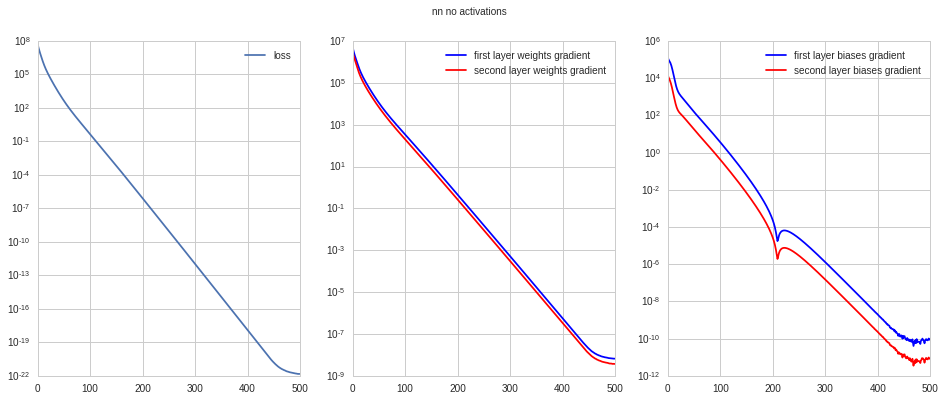

In [21]:
fig,ax = plt.subplots(ncols=3,figsize=(16,6))
fig.suptitle('nn no activations')
ax[0].semilogy(losses,label='loss')
ax[1].semilogy(gradients_w1,'b',label='first layer weights gradient')
ax[1].semilogy(gradients_w2,'r',label='second layer weights gradient')
ax[2].semilogy(gradients_b1,'b',label='first layer biases gradient')
ax[2].semilogy(gradients_b2,'r',label='second layer biases gradient')
for a in ax:
    a.legend()
plt.show()

In [22]:
import torch
from torch.autograd import Variable

In [23]:
import tqdm

In [24]:
dtype = torch.FloatTensor
#dtype = torch.cuda.FloatTensor # GPU

N, D_in, H, D_out = 64, 1000, 100, 10


x = Variable(torch.randn(N, D_in).type(dtype), requires_grad=False) #it's constant tensors so 
y = Variable(torch.randn(N, D_out).type(dtype), requires_grad=False)#we don't need to modify them


w1 = Variable(torch.randn(D_in, H).type(dtype), requires_grad=True) 
w2 = Variable(torch.randn(H, D_out).type(dtype), requires_grad=True)
b1 = Variable(torch.randn(N,H).type(dtype),requires_grad=True)
b2 = Variable(torch.randn(N,D_out).type(dtype),requires_grad=True)

learning_rate = 1e-6
losses = []
iterations = []
gradient_w1 = []
gradient_w2 = []
gradient_b1 = []
gradient_b2 = []
for t in tqdm.tqdm(range(500)):
    y_pred = (x.mm(w1) + b1).clamp(min=0).mm(w2) + b2

    loss = (y_pred - y).pow(2).sum()
    #print(t, loss.data[0])
    losses.append(loss.data[0])
    iterations.append(t)
    # Обнуляем градиенты
    gradient_w1.append(w1.grad.norm().data[0])
    gradient_w2.append(w2.grad.norm().data[0])
    gradient_b1.append(b1.grad.norm().data[0])
    gradient_b2.append(b2.grad.norm().data[0])
    
    w1.grad.data.zero_()
    w2.grad.data.zero_()
    b1.grad.data.zero_()
    b2.grad.data.zero_()

    loss.backward()

    w1.data -= learning_rate * w1.grad.data
    w2.data -= learning_rate * w2.grad.data

100%|██████████| 500/500 [00:01<00:00, 252.72it/s]


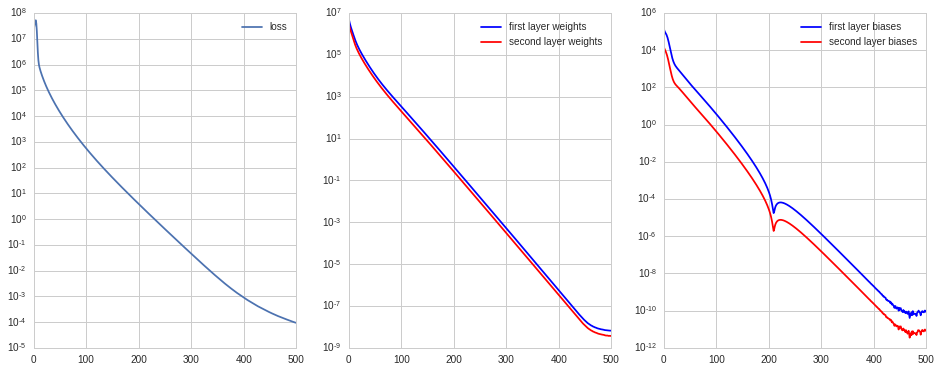

In [25]:
fig,ax = plt.subplots(ncols=3,figsize=(16,6))
ax[0].semilogy(losses,label='loss')
ax[1].semilogy(gradients_w1,'b',label='first layer weights')
ax[1].semilogy(gradients_w2,'r',label='second layer weights')
ax[2].semilogy(gradients_b1,'b',label='first layer biases')
ax[2].semilogy(gradients_b2,'r',label='second layer biases')
for a in ax:
    a.legend()
plt.show()

# Задача

Повторить обучение на mnist из прошлой домашки:
 	
Используя структуру сети Sequental в pytorch реализовать и обучить классификатор цифр из MNIST

1. Количество слоев от 1 до 4
2. Разные размеры скрытых слоев: 5, 10, 50, 100, 300
3. С разными функциями активации (без, ReLU, sigmoid, tanh)
4. С разными функциями потерь (CrossEntropy, MSE)
5. Со смещениями и без.

Каждый пункт 2-3 варианта.

Результат в форме отчета: скорость и качество обучения от параметров сети.
Везде где имеет смысл нарисовать графики.

Объяснить разницу в обучении с разными параметрами.

### План действий:
1) Будем по порядку создавать нейросети с различной глубиной (от 1 до 4 скрытых слоёв) с различными функциями активации. Так можно определить, какие функции активации при фиксированном количестве слоёв работают наилучшим образом. Скорость обучения и параметр регуляризации при этом оставим фиксированным. При этом будет использовать в качестве функции потерь кросс-энтропию. Количество эпох обучения зафиксируем равным 50. По умолчанию будем считать, что смещения включены.

2) Теперь зафиксируем архитектуру сети (в т.ч. количество слоёв и функции активации) - выберем из пункта 1 нейросеть, дающую максимальный результат. Изменим в ней функцию потерь на среднюю квадратичную ошибку. Сравним результаты.
* отдельно сравним предсказательную способность сети без нелинейности в случае MSE и Cross-Entropy

3) Попробуем убрать смещения из сети (архитектуру выберем аналогично п.2). Посмотрим, как это влияет на точность предсказаний.

In [26]:
mnist=fetch_mldata(dataname='MNIST original',data_home='mnist')
X,T = mnist['data'],mnist['target']
p = np.random.permutation(X.shape[0])

lb = LabelBinarizer()
X,T = X[p],T[p]
#T = lb.fit_transform(T[p])
X_train, T_train = X[:50000]/255.,T[:50000]
X_val,T_val = X[50000:60000]/255.,T[50000:60000]
X_test,T_test = X[60000:]/255.,T[60000:]

dtype1 = torch.LongTensor

X_val_torch = Variable(torch.from_numpy(X_val).type(dtype),requires_grad=False)
y_val_torch = Variable(torch.from_numpy(T_val).type(dtype1),requires_grad=False)

In [27]:
N,batch_size, D_in,D_2, D_3, D_4, D_out = 50000, 64, 784, 200,100,50, 10
learning_rate = 3e-4
weight_decay = 1e-4
n_epochs = 50

In [28]:
def train_nn(model,optimizer,loss_fn,num_layers):
    """train_nn:
    args:
    - model - nn architecture
    - optimizer
    - num_layers - number of layers in nn
    -------
    return:
    (loss_train,loss_on_val,acc_on_val,grad_weights,grad_bias)
    - loss on train set
    - loss on validation set
    - accuracy on validation set
    - mean gradient values during training"""
    
    loss_train = []
    loss_on_val = []
    acc_on_val = []

    grad_weights = [[] for i in xrange(num_layers)]
    grad_bias = [[] for i in xrange(num_layers)]


    for epoch in tqdm.tqdm(xrange(n_epochs)):
        loss_in_batch = []
        
        temp_grad_weights = [[] for i in xrange(num_layers)]
        temp_grad_bias = [[] for i in xrange(num_layers)]
        
        for i in xrange(batch_size,50000,batch_size):
            x = Variable(torch.from_numpy(X_train[i-batch_size:i]).type(dtype),requires_grad=False)
            y = Variable(torch.from_numpy(T_train[i-batch_size:i]).type(dtype1),requires_grad=False)
            y_pred = model(x)
            loss = loss_fn(y_pred, y)
            loss_in_batch.append(loss.data[0])
            

            for i in xrange(num_layers):
                temp_grad_weights[i].append(optimizer.param_groups[0]['params'][2*i].norm().data[0])
                temp_grad_bias[i].append(optimizer.param_groups[0]['params'][2*i + 1].norm().data[0])

                    
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
        for i in xrange(num_layers):
                grad_weights[i].append(np.mean(temp_grad_weights[i]))
                grad_bias[i].append(np.mean(temp_grad_bias[i]))

        loss_train.append(np.mean(loss_in_batch))
        y_pred_val = model(X_val_torch)
        loss_on_val.append(loss_fn(y_pred_val,y_val_torch).data[0])
        maxs, indices = torch.max(y_pred_val, 1)
        indices = np.ravel(np.array(indices.data.tolist()))
        acc_on_val.append(sm.accuracy_score(T_val,indices))
    
    return (loss_train,loss_on_val,acc_on_val,grad_weights,grad_bias)

def plot_loss_accuracy(loss_train,loss_on_val,accuracies):
    """plot subplots with losses and accuracies"""
    fig,axarr = plt.subplots(nrows=1,ncols=2,figsize=(16,6))
    axarr[0].plot(loss_train,label='loss on train')
    axarr[0].plot(loss_on_val,label='loss on validation')
    axarr[0].set_ylabel('loss')
    axarr[1].plot(accuracies,label='accuracy')
    axarr[1].set_ylabel('accuracy')
    for ax in axarr:
        ax.set_xlabel('epochs')
        ax.legend(loc='best')
    plt.show()
    
def plot_gradient(grad_weights,grad_bias,plot_abs=False):
    """plot subplots with mean value of gradients"""
    if plot_abs:  
        fig,axarr = plt.subplots(nrows=1,ncols=2,figsize=(16,6))
        for num_layer,g_w in enumerate(grad_weights):
            axarr[0].plot(np.abs(g_w),label='layer {}'.format(num_layer))

        axarr[0].legend(loc='best')
        axarr[0].set_ylabel('mean value of gradients')
        axarr[0].set_xlabel('epochs')
        axarr[0].set_title('weights')

        for num_layer,g_b in enumerate(grad_bias):
            axarr[1].plot(np.abs(g_b),label='layer {}'.format(num_layer))
        axarr[1].legend(loc='best')
        axarr[1].set_ylabel('mean value of gradients')
        axarr[1].set_xlabel('epochs')
        axarr[1].set_title('bias')
        plt.show()
    else:        
        fig,axarr = plt.subplots(nrows=1,ncols=2,figsize=(16,6))
        for num_layer,g_w in enumerate(grad_weights):
            axarr[0].plot(g_w,label='layer {}'.format(num_layer))

        axarr[0].legend(loc='best')
        axarr[0].set_ylabel('mean value of gradients')
        axarr[0].set_xlabel('epochs')
        axarr[0].set_title('weights')

        for num_layer,g_b in enumerate(grad_bias):
            axarr[1].plot(g_b,label='layer {}'.format(num_layer))
        axarr[1].legend(loc='best')
        axarr[1].set_ylabel('mean value of gradients')
        axarr[1].set_xlabel('epochs')
        axarr[1].set_title('bias')
        plt.show()

## 1.1 Функция активации - Sigmoid
### 1. Однослойная сеть

In [29]:
model = torch.nn.Sequential(
              torch.nn.Linear(D_in, D_out),
            )
loss_fn = torch.nn.CrossEntropyLoss(size_average=True)

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate,weight_decay=weight_decay)

In [30]:
loss_train,loss_val,acc,grad_weights,grad_bias = train_nn(model,optimizer,loss_fn,num_layers=1)

100%|██████████| 50/50 [07:51<00:00,  9.45s/it]


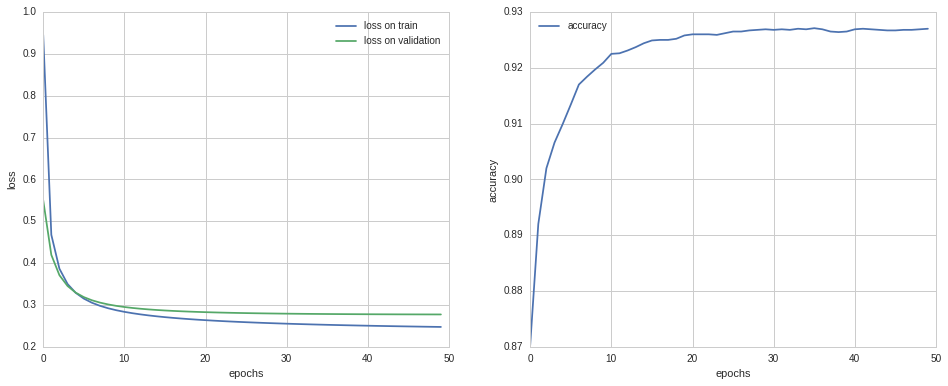

In [31]:
plot_loss_accuracy(loss_train,loss_val,acc)

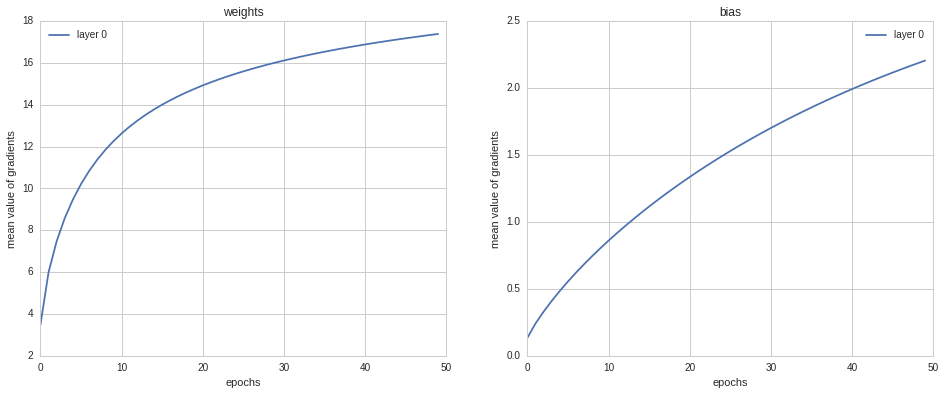

In [32]:
plot_gradient(grad_weights,grad_bias)

### 2. Двуслойная сеть
** Параметры: ** 784 -> 50 -> 10

In [33]:
model = torch.nn.Sequential(
              torch.nn.Linear(D_in, D_4),
              torch.nn.Sigmoid(),
              torch.nn.Linear(D_4,D_out),
            )
loss_fn = torch.nn.CrossEntropyLoss(size_average=True)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate,weight_decay=weight_decay)

In [34]:
loss_train_S2,loss_val_S2,acc_S2,grad_weights_S2,grad_bias_S2 = train_nn(model,optimizer,loss_fn,num_layers=2)

100%|██████████| 50/50 [08:46<00:00, 10.67s/it]


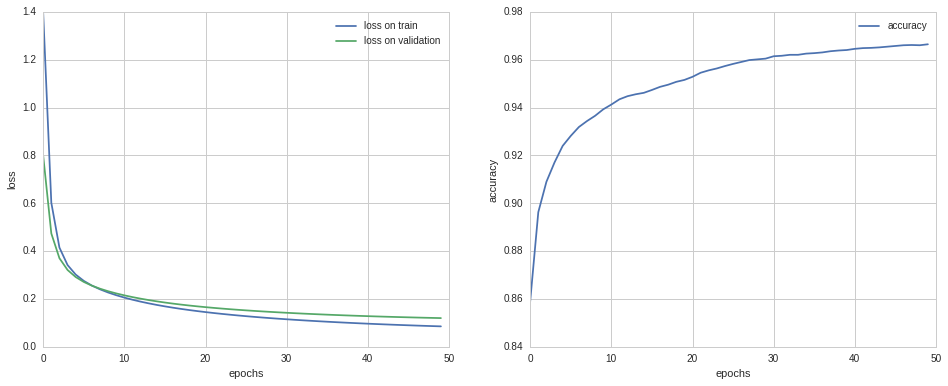

In [35]:
plot_loss_accuracy(loss_train_S2,loss_val_S2,acc_S2)

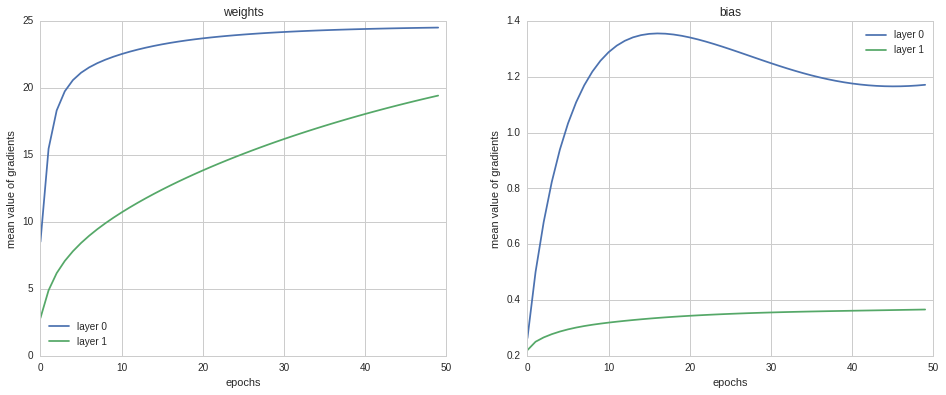

In [36]:
plot_gradient(grad_weights_S2,grad_bias_S2)

### 3. Трехслойная
784 -> 100 -> 50 -> 10

In [37]:
model = torch.nn.Sequential(
                    torch.nn.Linear(D_in, D_3),
                    torch.nn.Sigmoid(),
                    torch.nn.Linear(D_3,D_4),
                    torch.nn.Sigmoid(),
                    torch.nn.Linear(D_4,D_out)
            )
loss_fn = torch.nn.CrossEntropyLoss(size_average=True)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate,weight_decay=weight_decay)

loss_train_S3,loss_val_S3,acc_S3,grad_weights_S3,grad_bias_S3 = train_nn(model,optimizer,loss_fn,num_layers=3)

100%|██████████| 50/50 [10:44<00:00, 12.88s/it]


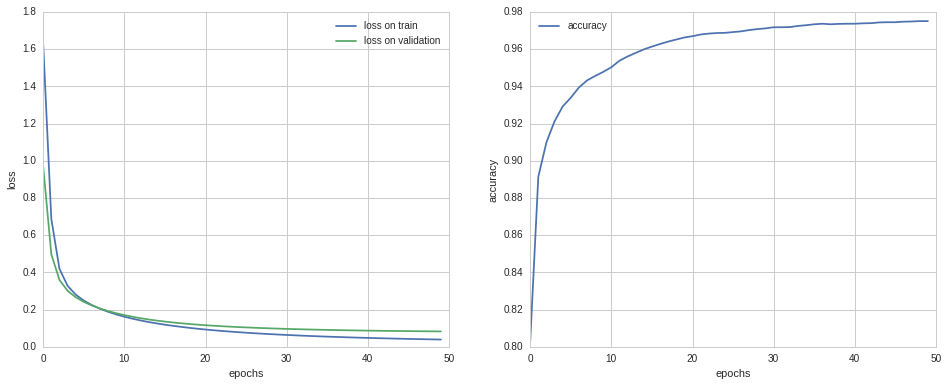

In [38]:
plot_loss_accuracy(loss_train_S3,loss_val_S3,acc_S3)

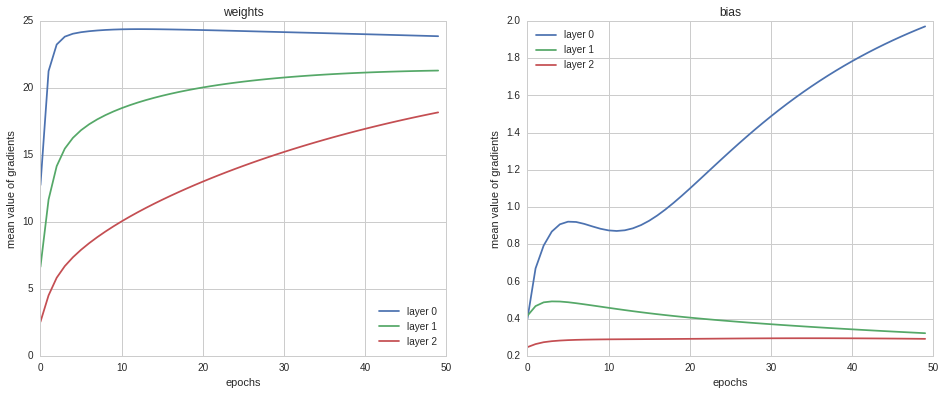

In [39]:
plot_gradient(grad_weights_S3,grad_bias_S3)

### 4. Четыре слоя
784 - 200 - 100 - 50 - 10

In [40]:
model = torch.nn.Sequential(
                    torch.nn.Linear(D_in, D_2),
                    torch.nn.Sigmoid(),
                    torch.nn.Linear(D_2, D_3),
                    torch.nn.Sigmoid(),
                    torch.nn.Linear(D_3,D_4),
                    torch.nn.Sigmoid(),
                    torch.nn.Linear(D_4,D_out)
            )
loss_fn = torch.nn.CrossEntropyLoss(size_average=True)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate,weight_decay=weight_decay)

loss_train_S4,loss_val_S4,acc_S4,grad_weights_S4,grad_bias_S4 = train_nn(model,optimizer,loss_fn,num_layers=4)

100%|██████████| 50/50 [27:35<00:00, 33.25s/it]


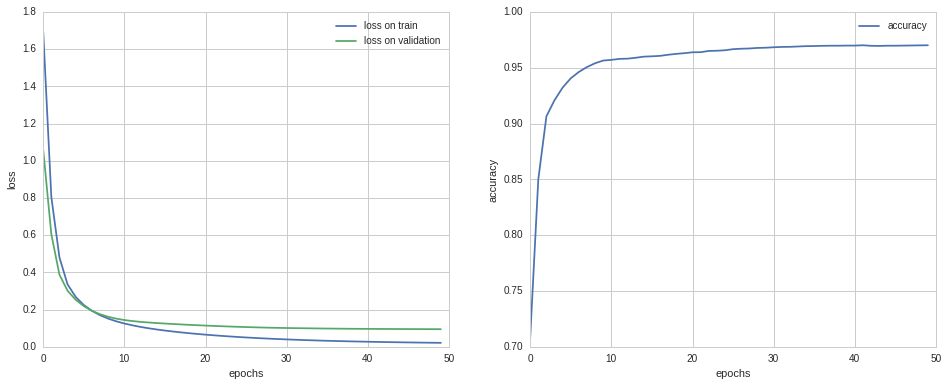

In [41]:
plot_loss_accuracy(loss_train_S4,loss_val_S4,acc_S4)

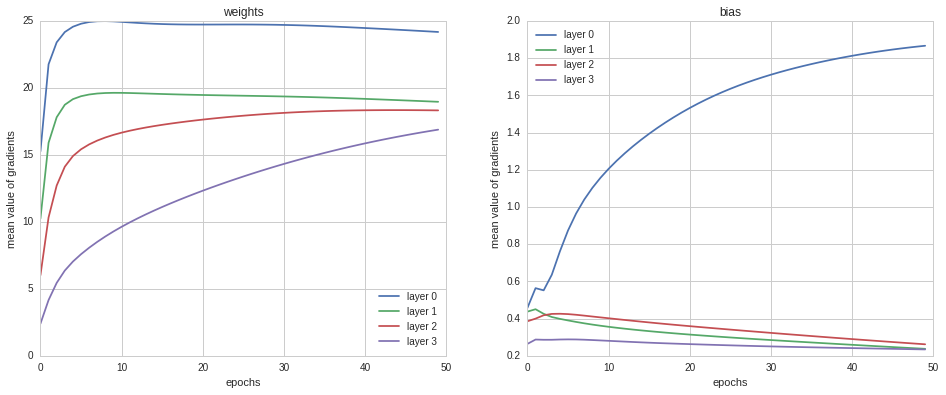

In [42]:
plot_gradient(grad_weights_S4,grad_bias_S4)

Аналогично сделаем с ReLU активациями и тангенциальными активациями. (Чтобы не делать слишком большим вывод, я просто оставлю здесь только тренировки, графики выводить не буду)

## 1.2 ReLU

In [43]:
model = torch.nn.Sequential(
                    torch.nn.Linear(D_in, D_4),
                    torch.nn.ReLU(),
                    torch.nn.Linear(D_4,D_out)
            )
loss_fn = torch.nn.CrossEntropyLoss(size_average=True)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate,weight_decay=weight_decay)

print "I'm training 2 layers nn"
loss_train_R2,loss_val_R2,acc_R2,grad_weights_R2,grad_bias_R2 = train_nn(model,optimizer,loss_fn,num_layers=2)

model = torch.nn.Sequential(
                    torch.nn.Linear(D_in, D_3),
                    torch.nn.ReLU(),
                    torch.nn.Linear(D_3,D_4),
                    torch.nn.ReLU(),
                    torch.nn.Linear(D_4,D_out)
            )
loss_fn = torch.nn.CrossEntropyLoss(size_average=True)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate,weight_decay=weight_decay)

print "I'm training 3 layers nn"
loss_train_R3,loss_val_R3,acc_R3,grad_weights_R3,grad_bias_R3 = train_nn(model,optimizer,loss_fn,num_layers=3)

model = torch.nn.Sequential(
                    torch.nn.Linear(D_in, D_2),
                    torch.nn.ReLU(),
                    torch.nn.Linear(D_2, D_3),
                    torch.nn.ReLU(),
                    torch.nn.Linear(D_3,D_4),
                    torch.nn.ReLU(),
                    torch.nn.Linear(D_4,D_out)
            )
loss_fn = torch.nn.CrossEntropyLoss(size_average=True)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate,weight_decay=weight_decay)

print "I'm training 4 layers nn"
loss_train_R4,loss_val_R4,acc_R4,grad_weights_R4,grad_bias_R4 = train_nn(model,optimizer,loss_fn,num_layers=4)

  0%|          | 0/50 [00:00<?, ?it/s]

I'm training 2 layers nn


  0%|          | 0/50 [00:00<?, ?it/s]

I'm training 3 layers nn


  0%|          | 0/50 [00:00<?, ?it/s]

I'm training 4 layers nn


100%|██████████| 50/50 [28:17<00:00, 35.11s/it]


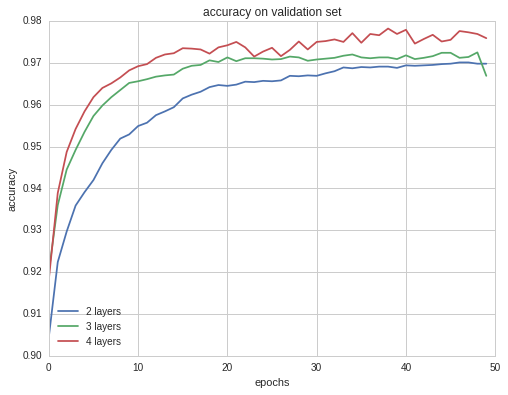

In [44]:
fig = plt.figure(figsize=(8,6))
plt.plot(acc_R2,label='2 layers')
plt.plot(acc_R3,label='3 layers')
plt.plot(acc_R4,label='4 layers')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('accuracy on validation set')
plt.legend(loc='best')

## 1.3 Tanh

In [45]:
model = torch.nn.Sequential(
                    torch.nn.Linear(D_in, D_4),
                    torch.nn.Tanh(),
                    torch.nn.Linear(D_4,D_out)
            )
loss_fn = torch.nn.CrossEntropyLoss(size_average=True)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate,weight_decay=weight_decay)

print "I'm training 2 layers nn"
loss_train_T2,loss_val_T2,acc_T2,grad_weights_T2,grad_bias_T2 = train_nn(model,optimizer,loss_fn,num_layers=2)

model = torch.nn.Sequential(
                    torch.nn.Linear(D_in, D_3),
                    torch.nn.Tanh(),
                    torch.nn.Linear(D_3,D_4),
                    torch.nn.Tanh(),
                    torch.nn.Linear(D_4,D_out)
            )
loss_fn = torch.nn.CrossEntropyLoss(size_average=True)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate,weight_decay=weight_decay)

print "I'm training 3 layers nn"
loss_train_T3,loss_val_T3,acc_T3,grad_weights_T3,grad_bias_T3 = train_nn(model,optimizer,loss_fn,num_layers=3)

model = torch.nn.Sequential(
                    torch.nn.Linear(D_in, D_2),
                    torch.nn.Tanh(),
                    torch.nn.Linear(D_2, D_3),
                    torch.nn.Tanh(),
                    torch.nn.Linear(D_3,D_4),
                    torch.nn.Tanh(),
                    torch.nn.Linear(D_4,D_out)
            )
loss_fn = torch.nn.CrossEntropyLoss(size_average=True)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate,weight_decay=weight_decay)

print "I'm training 4 layers nn"
loss_train_T4,loss_val_T4,acc_T4,grad_weights_T4,grad_bias_T4 = train_nn(model,optimizer,loss_fn,num_layers=4)

  0%|          | 0/50 [00:00<?, ?it/s]

I'm training 2 layers nn


  0%|          | 0/50 [00:00<?, ?it/s]

I'm training 3 layers nn


  0%|          | 0/50 [00:00<?, ?it/s]

I'm training 4 layers nn


100%|██████████| 50/50 [27:45<00:00, 33.44s/it]


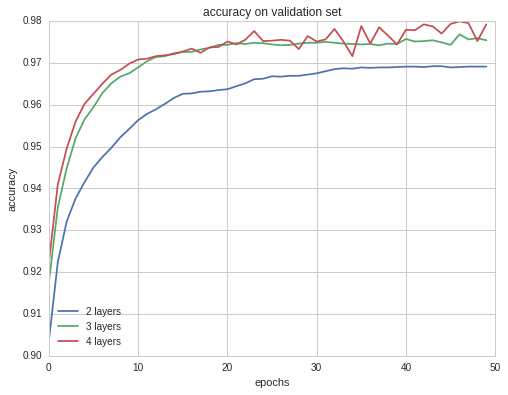

In [46]:
fig = plt.figure(figsize=(8,6))
plt.plot(acc_T2,label='2 layers')
plt.plot(acc_T3,label='3 layers')
plt.plot(acc_T4,label='4 layers')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('accuracy on validation set')
plt.legend(loc='best')

Сравним результаты нейросетей с различными активационными функциями

In [47]:
import mpld3

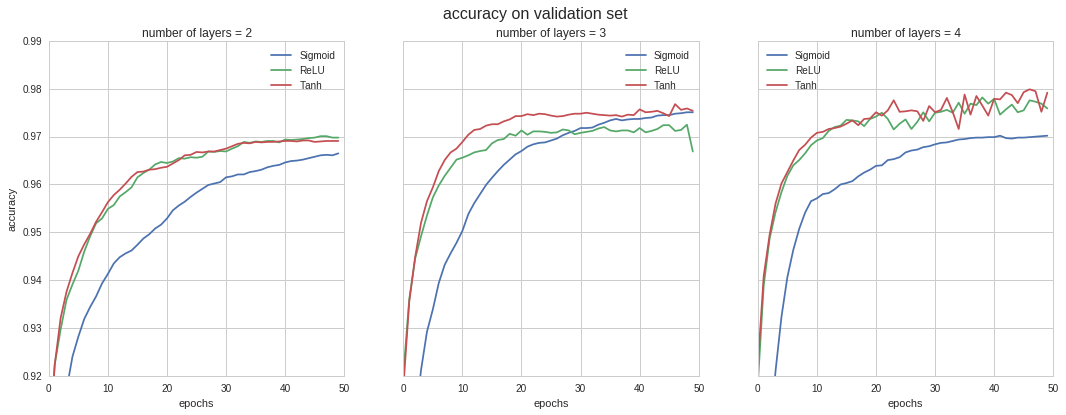

In [48]:
acc_S = [acc_S2,acc_S3,acc_S4]
acc_R = [acc_R2,acc_R3,acc_R4]
acc_T = [acc_T2,acc_T3,acc_T4]

fig,axarr = plt.subplots(nrows=1,ncols=3,figsize=(18,6),sharey=True)
fig.suptitle('accuracy on validation set',fontsize=16)
for i in xrange(3):
    axarr[i].plot(acc_S[i],label='Sigmoid')
    axarr[i].plot(acc_R[i],label='ReLU')
    axarr[i].plot(acc_T[i],label='Tanh')
    axarr[i].legend(loc='best')
    axarr[i].set_ylim((0.92,0.99))
    axarr[i].set_title('number of layers = {}'.format(i+2))
    axarr[i].set_xlabel('epochs')
axarr[0].set_ylabel('accuracy')
#mpld3.show()

Посмотрим, как хорошо тренируется входной слой нейросетей с различными функциями активации

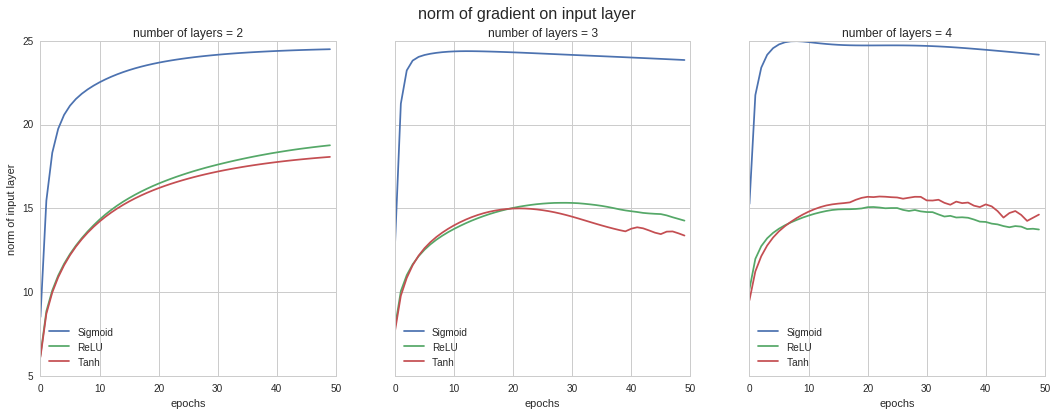

In [49]:
grad_weights_S = [grad_weights_S2[0],grad_weights_S3[0],grad_weights_S4[0]]
grad_weights_R = [grad_weights_R2[0],grad_weights_R3[0],grad_weights_R4[0]]
grad_weights_T = [grad_weights_T2[0],grad_weights_T3[0],grad_weights_T4[0]]

fig,axarr = plt.subplots(nrows=1,ncols=3,figsize=(18,6),sharey=True)
fig.suptitle('norm of gradient on input layer',fontsize=16)
for i in xrange(3):
    axarr[i].plot(grad_weights_S[i],label='Sigmoid')
    axarr[i].plot(grad_weights_R[i],label='ReLU')
    axarr[i].plot(grad_weights_T[i],label='Tanh')
    axarr[i].legend(loc='best')
    axarr[i].set_title('number of layers = {}'.format(i+2))
    axarr[i].set_xlabel('epochs')
axarr[0].set_ylabel('norm of input layer')

#mpld3.show()

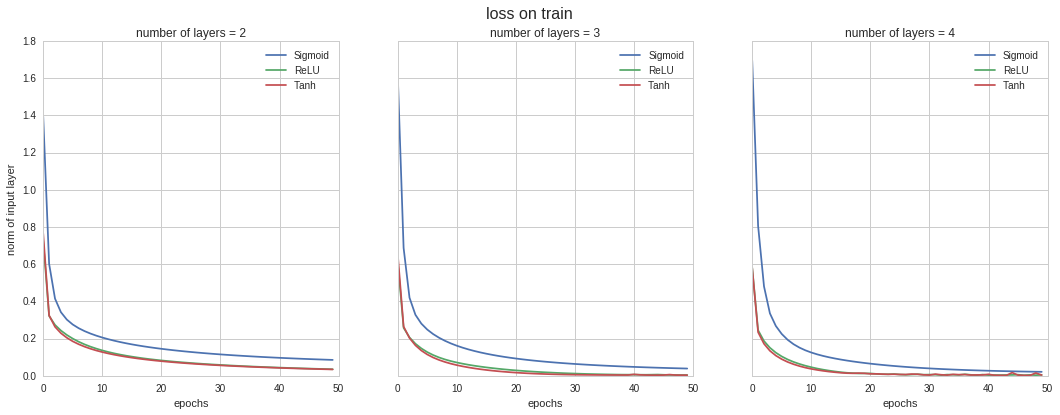

In [50]:
loss_train_S = [loss_train_S2,loss_train_S3,loss_train_S4]
loss_train_R = [loss_train_R2,loss_train_R3,loss_train_R4]
loss_train_T = [loss_train_T2,loss_train_T3,loss_train_T4]

fig,axarr = plt.subplots(nrows=1,ncols=3,figsize=(18,6),sharey=True)
fig.suptitle('loss on train',fontsize=16)
for i in xrange(3):
    axarr[i].plot(loss_train_S[i],label='Sigmoid')
    axarr[i].plot(loss_train_R[i],label='ReLU')
    axarr[i].plot(loss_train_T[i],label='Tanh')
    axarr[i].legend(loc='best')
    axarr[i].set_title('number of layers = {}'.format(i+2))
    axarr[i].set_xlabel('epochs')
axarr[0].set_ylabel('norm of input layer')

#mpld3.show()

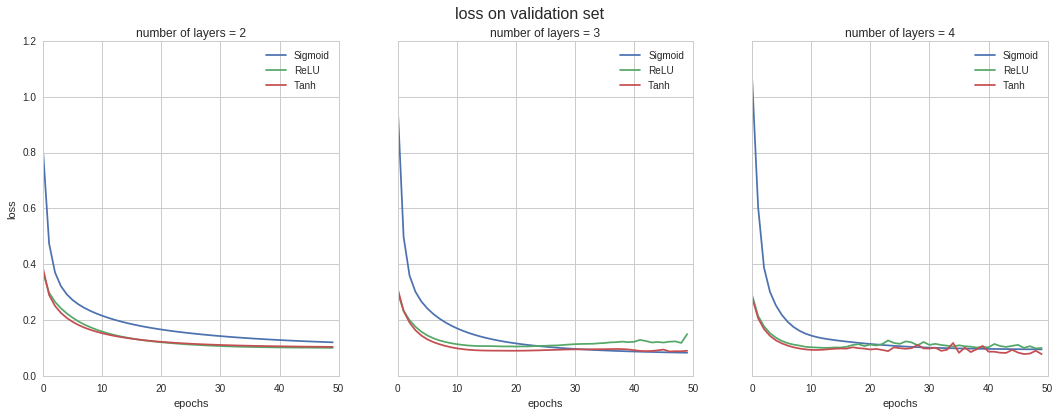

In [51]:
loss_val_S = [loss_val_S2,loss_val_S3,loss_val_S4]
loss_val_R = [loss_val_R2,loss_val_R3,loss_val_R4]
loss_val_T = [loss_val_T2,loss_val_T3,loss_val_T4]

fig,axarr = plt.subplots(nrows=1,ncols=3,figsize=(18,6),sharey=True)
fig.suptitle('loss on validation set',fontsize=16)
for i in xrange(3):
    axarr[i].plot(loss_val_S[i],label='Sigmoid')
    axarr[i].plot(loss_val_R[i],label='ReLU')
    axarr[i].plot(loss_val_T[i],label='Tanh')
    axarr[i].legend(loc='best')
    axarr[i].set_title('number of layers = {}'.format(i+2))
    axarr[i].set_xlabel('epochs')
axarr[0].set_ylabel('loss')

#mpld3.show()

2. Сравнение MSE и CrossEntropy
--------------------
Используем нейросеть с тремя линейными слоями и с тангенциальной функцией активации.
Посмотрим, насколько изменится скорость обучения и точность при изменении функции потерь с кросс-энтропии на MSE. Вместо последнего слоя будем использовать не softmax, а просто предсказывать линейным слоем значение класса от 0 до 9


In [52]:
from sklearn.preprocessing import label_binarize

In [53]:
model = torch.nn.Sequential(
                    torch.nn.Linear(D_in, D_3),
                    torch.nn.Tanh(),
                    torch.nn.Linear(D_3,D_4),
                    torch.nn.Tanh(),
                    torch.nn.Linear(D_4,1),
            )
loss_fn = torch.nn.MSELoss(size_average=True)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate,weight_decay=weight_decay)

X,T = X[p],T[p]

X_train, T_train = X[:50000]/255.,T[:50000]/1.
X_val,T_val = X[50000:60000]/255.,T[50000:60000]/1.

X_val_torch = Variable(torch.from_numpy(X_val).type(dtype),requires_grad=False)
y_val_torch = Variable(torch.from_numpy(T_val).type(dtype),requires_grad=False)

print "I'm training 3 layers nn"

num_layers = 3
loss_train_T3_MSE = []
loss_val_T3_MSE = []
acc_T3_MSE = []

grad_weights_T3_MSE = [[] for i in xrange(num_layers)]
grad_bias_T3_MSE = [[] for i in xrange(num_layers)]


for epoch in tqdm.tqdm(xrange(n_epochs)):
    loss_in_batch = []
        
    temp_grad_weights = [[] for i in xrange(num_layers)]
    temp_grad_bias = [[] for i in xrange(num_layers)]
        
    for i in xrange(batch_size,50000,batch_size):
        x = Variable(torch.from_numpy(X_train[i-batch_size:i]).type(dtype),requires_grad=False)
        y = Variable(torch.from_numpy(T_train[i-batch_size:i]).type(dtype),requires_grad=False)
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        loss_in_batch.append(loss.data[0])

        for i in xrange(num_layers):
            temp_grad_weights[i].append(optimizer.param_groups[0]['params'][2*i].norm().data[0])
            temp_grad_bias[i].append(optimizer.param_groups[0]['params'][2*i + 1].norm().data[0])

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
            
    for i in xrange(num_layers):
            grad_weights_T3_MSE[i].append(np.mean(temp_grad_weights[i]))
            grad_bias_T3_MSE[i].append(np.mean(temp_grad_bias[i]))

    loss_train_T3_MSE.append(np.mean(loss_in_batch))
    y_pred_val = model(X_val_torch)
    loss_val_T3_MSE.append(loss_fn(y_pred_val,y_val_torch).data[0])
    indices = np.round(np.ravel(np.array(y_pred_val.data.tolist())))
    acc_T3_MSE.append(sm.accuracy_score(T_val,indices))

  0%|          | 0/50 [00:00<?, ?it/s]

I'm training 3 layers nn


100%|██████████| 50/50 [04:25<00:00,  5.35s/it]


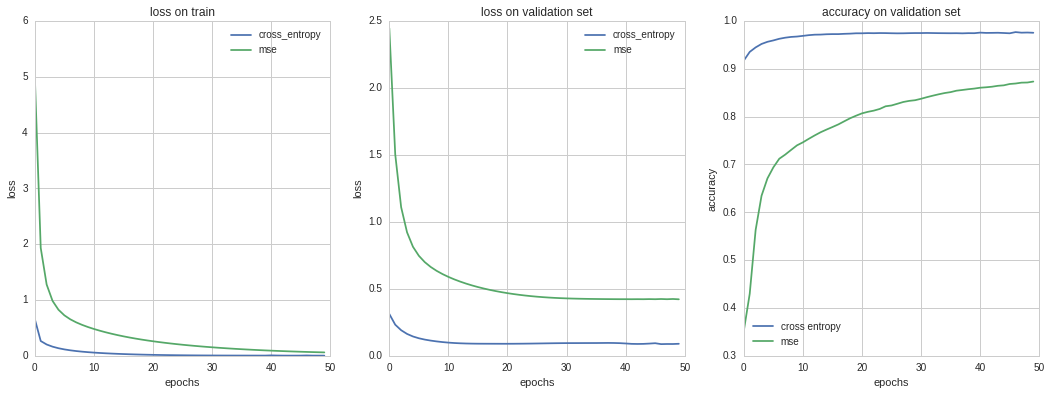

In [54]:
fig,axarr = plt.subplots(nrows=1,ncols=3,figsize=(18,6))
axarr[0].plot(loss_train_T3,label='cross_entropy')
axarr[0].plot(loss_train_T3_MSE,label='mse')
axarr[0].set_xlabel('epochs')
axarr[0].set_ylabel('loss')
axarr[0].set_title('loss on train')

axarr[1].plot(loss_val_T3,label='cross_entropy')
axarr[1].plot(loss_val_T3_MSE,label='mse')
axarr[1].set_xlabel('epochs')
axarr[1].set_ylabel('loss')
axarr[1].set_title('loss on validation set')

axarr[2].plot(acc_T3,label='cross entropy')
axarr[2].plot(acc_T3_MSE,label='mse')
axarr[2].set_xlabel('epochs')
axarr[2].set_ylabel('accuracy')
axarr[2].set_title('accuracy on validation set')

for a in axarr:
    a.legend(loc='best')

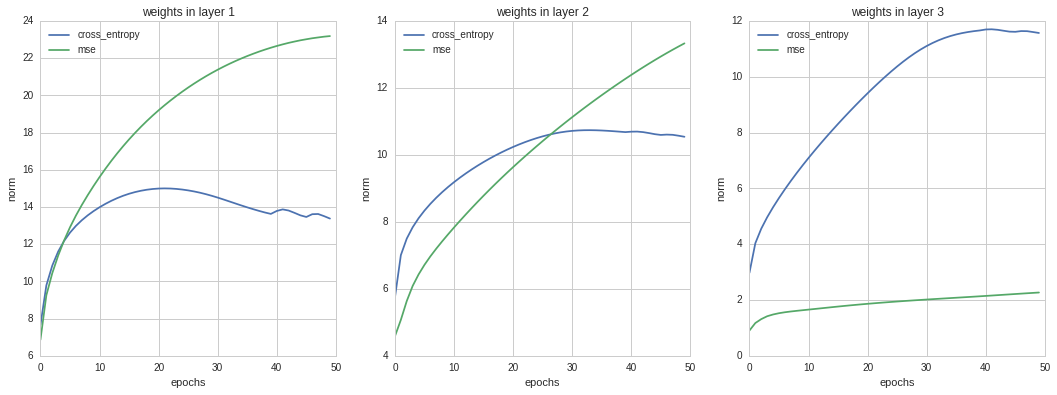

In [61]:
fig,axarr = plt.subplots(nrows=1,ncols=3,figsize=(18,6))
for i in xrange(3):
    axarr[i].plot(grad_weights_T3[i],label='cross_entropy')
    axarr[i].plot(grad_weights_T3_MSE[i],label='mse')
    axarr[i].set_xlabel('epochs')
    axarr[i].set_ylabel('norm')
    axarr[i].set_title('weights in layer {}'.format(i+1))
    axarr[i].legend(loc='best')

Видно, что точность предсказания с mse loss в данной задаче меньше при заданой конструкции, однако обучение происходит быстрее, чем в случае кросс-энтропии

3. Удалим смещения
--------------

сравним трехслойную сеть с тангенциальными функциями активации с добавленными смещениями и без них

In [56]:
def train_nn_nobias(model,optimizer,loss_fn,num_layers):
    """train_nn:
    args:
    - model - nn architecture
    - optimizer
    - num_layers - number of layers in nn
    -------
    return:
    (loss_train,loss_on_val,acc_on_val,grad_weights,grad_bias)
    - loss on train set
    - loss on validation set
    - accuracy on validation set
    - mean gradient values during training"""
    
    loss_train = []
    loss_on_val = []
    acc_on_val = []

    grad_weights = [[] for i in xrange(num_layers)]
    grad_bias = [[] for i in xrange(num_layers)]


    for epoch in tqdm.tqdm(xrange(n_epochs)):
        loss_in_batch = []
        
        temp_grad_weights = [[] for i in xrange(num_layers)]
        temp_grad_bias = [[] for i in xrange(num_layers)]
        
        for i in xrange(batch_size,50000,batch_size):
            x = Variable(torch.from_numpy(X_train[i-batch_size:i]).type(dtype),requires_grad=False)
            y = Variable(torch.from_numpy(T_train[i-batch_size:i]).type(dtype1),requires_grad=False)
            y_pred = model(x)
            loss = loss_fn(y_pred, y)
            loss_in_batch.append(loss.data[0])
            
            for i in xrange(num_layers):
                temp_grad_weights[i].append(optimizer.param_groups[0]['params'][i].norm().data[0])
                    
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
        for i in xrange(num_layers):
                grad_weights[i].append(np.mean(temp_grad_weights[i]))
                grad_bias[i].append(np.mean(temp_grad_bias[i]))

        loss_train.append(np.mean(loss_in_batch))
        y_pred_val = model(X_val_torch)
        loss_on_val.append(loss_fn(y_pred_val,y_val_torch).data[0])
        maxs, indices = torch.max(y_pred_val, 1)
        indices = np.ravel(np.array(indices.data.tolist()))
        acc_on_val.append(sm.accuracy_score(T_val,indices))
    
    return (loss_train,loss_on_val,acc_on_val,grad_weights,grad_bias)

In [58]:
mnist=fetch_mldata(dataname='MNIST original',data_home='mnist')
X,T = mnist['data'],mnist['target']
p = np.random.permutation(X.shape[0])

lb = LabelBinarizer()
X,T = X[p],T[p]
#T = lb.fit_transform(T[p])
X_train, T_train = X[:50000]/255.,T[:50000]
X_val,T_val = X[50000:60000]/255.,T[50000:60000]
X_test,T_test = X[60000:]/255.,T[60000:]

dtype1 = torch.LongTensor

X_val_torch = Variable(torch.from_numpy(X_val).type(dtype),requires_grad=False)
y_val_torch = Variable(torch.from_numpy(T_val).type(dtype1),requires_grad=False)



model = torch.nn.Sequential(
                    torch.nn.Linear(D_in, D_3,bias=False),
                    torch.nn.Tanh(),
                    torch.nn.Linear(D_3,D_4,bias=False),
                    torch.nn.Tanh(),
                    torch.nn.Linear(D_4,D_out,bias=False)
            )
loss_fn = torch.nn.CrossEntropyLoss(size_average=True)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate,weight_decay=weight_decay)

loss_train_T3_nob,loss_val_T3_nob,acc_T3_nob,grad_weights_T3_nob,grad_bias_T3_nob = train_nn_nobias(model,optimizer,loss_fn,num_layers=3)

  0%|          | 0/50 [00:00<?, ?it/s]/home/boris/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/home/boris/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 50/50 [10:27<00:00, 12.56s/it]


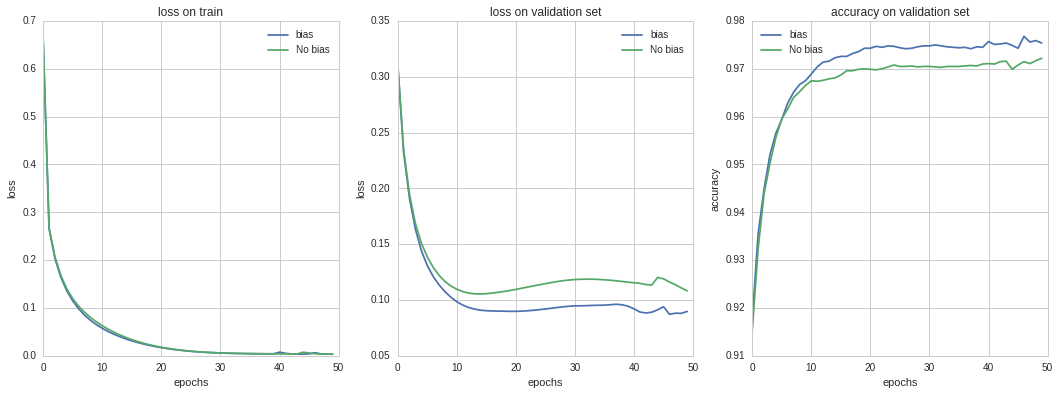

In [59]:
fig,axarr = plt.subplots(nrows=1,ncols=3,figsize=(18,6))
axarr[0].plot(loss_train_T3,label='bias')
axarr[0].plot(loss_train_T3_nob,label='No bias')
axarr[0].set_xlabel('epochs')
axarr[0].set_ylabel('loss')
axarr[0].set_title('loss on train')

axarr[1].plot(loss_val_T3,label='bias')
axarr[1].plot(loss_val_T3_nob,label='No bias')
axarr[1].set_xlabel('epochs')
axarr[1].set_ylabel('loss')
axarr[1].set_title('loss on validation set')

axarr[2].plot(acc_T3,label='bias')
axarr[2].plot(acc_T3_nob,label='No bias')
axarr[2].set_xlabel('epochs')
axarr[2].set_ylabel('accuracy')
axarr[2].set_title('accuracy on validation set')

for a in axarr:
    a.legend(loc='best')

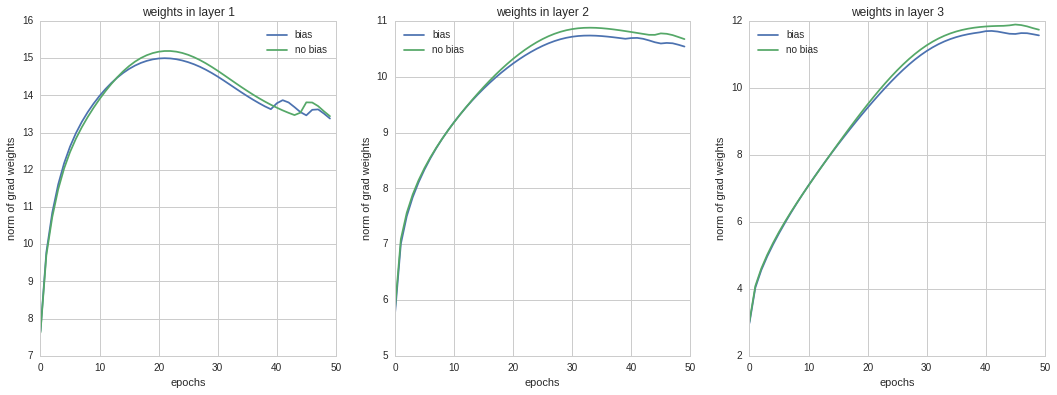

In [60]:
fig,axarr = plt.subplots(nrows=1,ncols=3,figsize=(18,6))
for i in xrange(3):
    axarr[i].plot(grad_weights_T3[i],label='bias')
    axarr[i].plot(grad_weights_T3_nob[i],label='no bias')
    axarr[i].set_xlabel('epochs')
    axarr[i].set_ylabel('norm of grad weights')
    axarr[i].set_title('weights in layer {}'.format(i+1))
    axarr[i].legend(loc='best')

Удаление смещений приводит к уменьшению точности на ~ 1%

### Сравним однослойную сеть и трехслойную сеть без активаций

In [62]:
model = torch.nn.Sequential(
                    torch.nn.Linear(D_in, D_3),
                    torch.nn.Linear(D_3,D_4),
                    torch.nn.Linear(D_4,D_out)
            )
loss_fn = torch.nn.CrossEntropyLoss(size_average=True)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate,weight_decay=weight_decay)

loss_train_noact,loss_val_noact,acc_noact,grad_weights_noact,grad_bias_noact = train_nn(model,optimizer,loss_fn,num_layers=3)

100%|██████████| 50/50 [10:21<00:00, 12.29s/it]


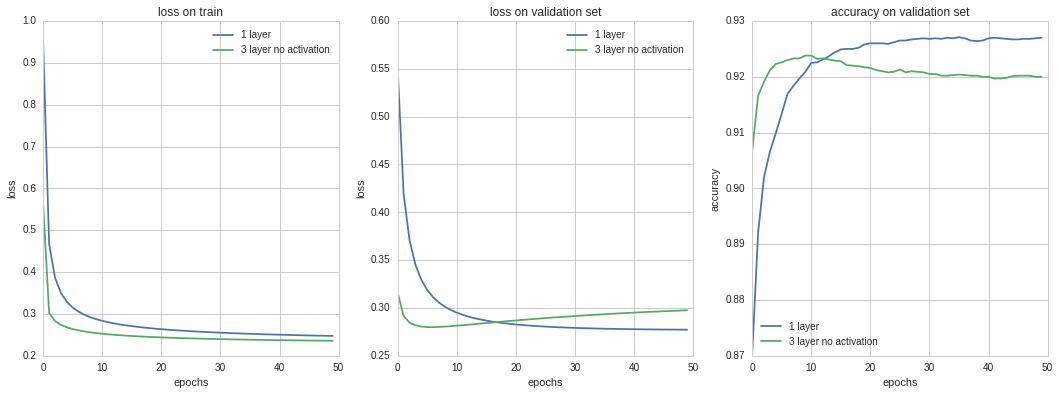

In [63]:
fig,axarr = plt.subplots(nrows=1,ncols=3,figsize=(18,6))
fig.suptitle('no activation and')
axarr[0].plot(loss_train,label='1 layer')
axarr[0].plot(loss_train_noact,label='3 layer no activation')
axarr[0].set_xlabel('epochs')
axarr[0].set_ylabel('loss')
axarr[0].set_title('loss on train')

axarr[1].plot(loss_val,label='1 layer')
axarr[1].plot(loss_val_noact,label='3 layer no activation')
axarr[1].set_xlabel('epochs')
axarr[1].set_ylabel('loss')
axarr[1].set_title('loss on validation set')

axarr[2].plot(acc,label='1 layer')
axarr[2].plot(acc_noact,label='3 layer no activation')
axarr[2].set_xlabel('epochs')
axarr[2].set_ylabel('accuracy')
axarr[2].set_title('accuracy on validation set')

for a in axarr:
    a.legend(loc='best')

А сеть без активаций просто переобучается на тренировочной выборке, судя по графикам